In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sb
import random
import scipy.stats as st


In [2]:
#Read the Data File and store into Pandas DataFrames
filepath="../Resource/labs.csv"
df= pd.read_csv(filepath)
df.head(10)

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1
5,73562,123.0,123.0,74.0,6541.6,166.22,NaN,NaN,NaN,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750.0,553.5
6,73563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,73564,19.0,19.0,242.0,21392.8,7.85,134054.109760,77.0,0.77,3.9,...,0.253,0.0,0.115,0.0,0.0309,0.0,NaN,21.28,668.0,493.0
8,73566,1.3,1.3,18.0,1591.2,7.22,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378.0,279.0
9,73567,35.0,35.0,215.0,19006.0,16.28,NaN,NaN,NaN,4.0,...,0.148,0.0,0.078,0.0,0.0436,0.0,NaN,6.07,194.0,143.2


In [3]:
#defining the selected variables and extracting the table from the main data
cols_to_clean = ['SEQN','LBXTHG', 'LBXBSE', 'LBXBPB', 'LBXBMN', 'LBXBCD', 'LBXTR', 'LBDLDL', 'LBDHDD']
variable_df=df[cols_to_clean]
variable_df.head()

,SEQN,LBXTHG,LBXBSE,LBXBPB,LBXBMN,LBXBCD,LBXTR,LBDLDL,LBDHDD
0,73557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0
1,73558,1.21,204.73,1.69,8.15,0.20,NaN,NaN,50.0
2,73559,1.27,209.64,1.45,9.57,0.22,51.0,56.0,60.0
3,73560,0.88,169.82,0.37,13.07,0.07,NaN,NaN,61.0
4,73561,NaN,NaN,NaN,NaN,NaN,75.0,101.0,85.0


In [4]:
#dropping the rows with null cells
for col in cols_to_clean:
    variable_df = variable_df.dropna(subset=[col])

In [5]:
variable_df.dtypes

SEQN        int64
LBXTHG    float64
LBXBSE    float64
LBXBPB    float64
LBXBMN    float64
LBXBCD    float64
LBXTR     float64
LBDLDL    float64
LBDHDD    float64
dtype: object

In [6]:
#renaming the variables
df2=variable_df.rename(columns={
    "SEQN":"patient ID",
    "LBXTHG":"mercury (ug/L)", 
    "LBXBSE":"selenium(ug/L)", 
    "LBXBPB":"lead(ug/dL)", 
    "LBXBMN": "manganese(ug/L)", 
    "LBXBCD":"cadmium(ug/L)", 
    "LBXTR":"triglycerides(mg/dL)", 
    "LBDLDL":"LDL-cholesterol(mg/dL)", 
    "LBDHDD":"HDL-Cholesterol(mg/dL)"
})

In [7]:
#double check the clean data
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1555 entries, 2 to 9799
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patient ID              1555 non-null   int64  
 1   mercury (ug/L)          1555 non-null   float64
 2   selenium(ug/L)          1555 non-null   float64
 3   lead(ug/dL)             1555 non-null   float64
 4   manganese(ug/L)         1555 non-null   float64
 5   cadmium(ug/L)           1555 non-null   float64
 6   triglycerides(mg/dL)    1555 non-null   float64
 7   LDL-cholesterol(mg/dL)  1555 non-null   float64
 8   HDL-Cholesterol(mg/dL)  1555 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 121.5 KB


In [8]:
df2

,patient ID,mercury (ug/L),selenium(ug/L),lead(ug/dL),manganese(ug/L),cadmium(ug/L),triglycerides(mg/dL),LDL-cholesterol(mg/dL),HDL-Cholesterol(mg/dL)
2,73559,1.27,209.64,1.45,9.57,0.22,51.0,56.0,60.0
7,73564,0.42,195.62,1.00,16.80,0.37,64.0,97.0,58.0
21,73580,0.46,188.00,0.31,4.22,0.07,57.0,159.0,55.0
48,73607,0.33,219.00,1.35,8.31,0.50,139.0,103.0,30.0
62,73621,0.87,212.84,1.38,8.14,0.36,78.0,70.0,75.0
...,...,...,...,...,...,...,...,...,...
9788,83707,0.31,156.32,1.09,14.46,0.14,111.0,46.0,53.0
9793,83712,0.20,169.46,2.10,5.91,0.10,193.0,94.0,32.0
9795,83714,0.20,191.38,0.51,15.02,0.39,141.0,127.0,32.0
9797,83716,0.20,161.75,0.37,8.43,0.11,101.0,68.0,55.0


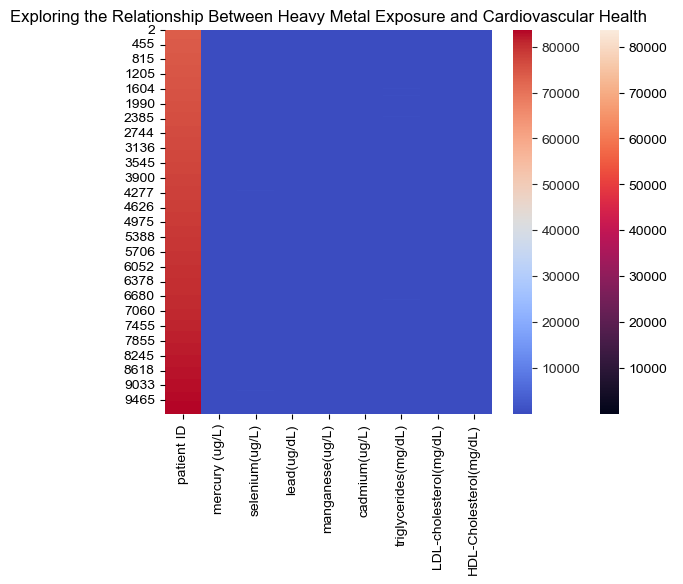

In [9]:
sb.heatmap(df2)
# Add title and axes labels
sb.set_style('darkgrid')
sb.heatmap(df2, annot=False, cmap='coolwarm')
plt.title('Exploring the Relationship Between Heavy Metal Exposure and Cardiovascular Health')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9)
# Show plot
plt.show()

In [10]:
df2.describe()

,patient ID,mercury (ug/L),selenium(ug/L),lead(ug/dL),manganese(ug/L),cadmium(ug/L),triglycerides(mg/dL),LDL-cholesterol(mg/dL),HDL-Cholesterol(mg/dL)
count,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000
mean,78662.312540,1.459074,196.809434,1.217871,10.393884,0.440662,103.600643,107.432154,54.388424
std,2869.195898,2.640359,23.959945,1.147653,3.734985,0.531356,62.638434,35.318660,15.958105
min,73559.000000,0.200000,105.380000,0.070000,3.280000,0.070000,19.000000,14.000000,16.000000
25%,76194.500000,0.370000,181.280000,0.540000,7.740000,0.150000,58.000000,81.000000,43.000000
50%,78702.000000,0.680000,194.690000,0.920000,9.650000,0.260000,87.000000,105.000000,52.000000
75%,81055.500000,1.460000,209.230000,1.470000,12.295000,0.530000,129.000000,129.000000,63.000000
max,83718.000000,46.390000,377.440000,13.470000,29.220000,7.230000,393.000000,375.000000,173.000000


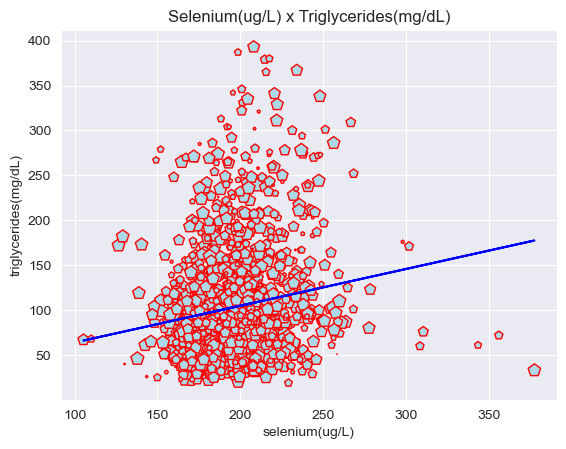

In [11]:
size = [random.uniform(0,1)*100 for _ in (df2["selenium(ug/L)"])]
##print(size)
##plt.scatter(df2["selenium(ug/L)"], df2["triglycerides(mg/dL)"], marker= "o", facecolors= "lightblue", edgecolors= "red ", s= size)

plt.scatter(df2["selenium(ug/L)"], df2["triglycerides(mg/dL)"], marker= "p", facecolors= ["lightblue"], edgecolors= ["red"], s= size)

# Add linear regression line
model = LinearRegression()
model.fit(df2["selenium(ug/L)"].values.reshape(-1, 1), df2["triglycerides(mg/dL)"])
x_line = df2["selenium(ug/L)"].values.reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color="blue")

# Add labels and title
plt.xlabel("selenium(ug/L)")
plt.ylabel("triglycerides(mg/dL)")
plt.title("Selenium(ug/L) x Triglycerides(mg/dL)")
plt.savefig("myGraph.png")

# Show the plot
plt.show()

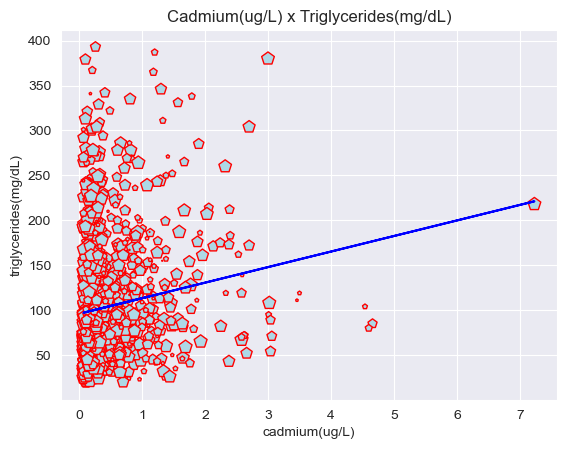

In [12]:
size = [random.uniform(0,1)*100 for _ in (df2["cadmium(ug/L)"])]
plt.scatter(df2["cadmium(ug/L)"], df2["triglycerides(mg/dL)"], marker= "p", facecolors= ["lightblue"], edgecolors= ["red"], s= size)


# Add linear regression line
model = LinearRegression()
model.fit(df2["cadmium(ug/L)"].values.reshape(-1, 1), df2["triglycerides(mg/dL)"])
x_line = df2["cadmium(ug/L)"].values.reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color="blue")

# Add labels and title
plt.xlabel("cadmium(ug/L)")
plt.ylabel("triglycerides(mg/dL)")
plt.title("Cadmium(ug/L) x Triglycerides(mg/dL)")
plt.savefig("(myGraph.png")

# Show the plot
plt.show()

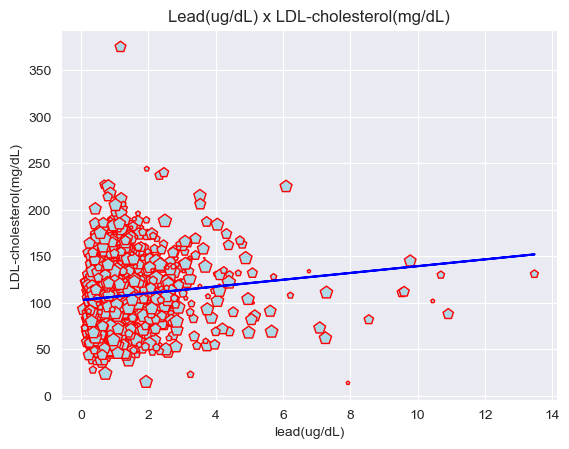

In [13]:
size = [random.uniform(0,1)*100 for _ in (df2["lead(ug/dL)"])]
plt.scatter(df2["lead(ug/dL)"], df2["LDL-cholesterol(mg/dL)"], marker= "p", facecolors= ["lightblue"], edgecolors= ["red"], s= size)


# Add linear regression line
model = LinearRegression()
model.fit(df2["lead(ug/dL)"].values.reshape(-1, 1), df2["LDL-cholesterol(mg/dL)"])
x_line = df2["lead(ug/dL)"].values.reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color="blue")

# Add labels and title 
plt.xlabel("lead(ug/dL)")
plt.ylabel("LDL-cholesterol(mg/dL)")
plt.title("Lead(ug/dL) x LDL-cholesterol(mg/dL)")
plt.savefig("myGraph.png")

# Show the plot
plt.show()

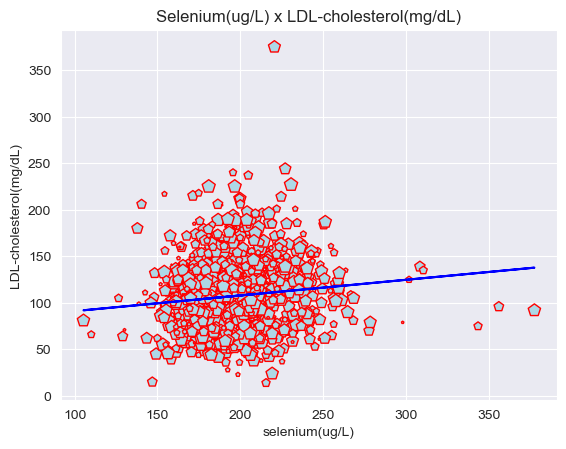

In [14]:
size = [random.uniform(0,1)*100 for _ in (df2["selenium(ug/L)"])]
plt.scatter(df2["selenium(ug/L)"], df2["LDL-cholesterol(mg/dL)"], marker= "p", facecolors= ["lightblue"], edgecolors= ["red"], s= size)


# Add linear regression line
model = LinearRegression()
model.fit(df2["selenium(ug/L)"].values.reshape(-1, 1), df2["LDL-cholesterol(mg/dL)"])
x_line = df2["selenium(ug/L)"].values.reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color="blue")

# Add labels and title
plt.xlabel("selenium(ug/L)")
plt.ylabel("LDL-cholesterol(mg/dL)")
plt.title("Selenium(ug/L) x LDL-cholesterol(mg/dL)")
plt.savefig("myGraph.png")

# Show the plot
plt.show()

In [15]:
#save the data in a new excel file(new_lab) which is now located in the Resource folder
df2.to_excel("../Resource/new_lab.xlsx", index=False , header=True)